In [36]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

In [3]:
batch = 2

In [4]:
def score(group, domain, batch, n):
    if domain != 9: 
        file = f'results/results_{group}_{domain}_{batch}_{n}.csv'
    else:
        file = f'results/results_{group}_nulls_{n}.csv'
    if os.path.isfile(file):
        df = pd.read_csv(file)
        return df['score'].to_numpy()
    else:
        return None

In [115]:
def plot2d(data, ticks, labels, ylabel, xlabel):
    plt.style.use('classic')
    plt.figure(facecolor='white')
    
    fig, ax = plt.subplots()
    
    colors = matplotlib.cm.get_cmap('Set1')
    
    for i in range(data.shape[0]):
        plt.plot(ticks, data[i], label=labels[i], linewidth=3, color=colors(i))
        
    #ax = plt.subplot(111)
    #ax.legend(loc='lower right', bbox_to_anchor=(2, 2), ncol=len(labels), fancybox=True, shadow=True)
    #ax.legend(loc='lower right', bbox_to_anchor=(1.2, 0.1), ncol=1, fancybox=True, shadow=True)
    
    plt.ylabel(ylabel, fontsize=20)
    plt.xlabel(xlabel, fontsize=20)
    plt.legend(loc='lower center', ncol=4)
    #plt.ylim(0, 1.05)
    plt.gca().xaxis.grid(True, linestyle='--')
    plt.gca().yaxis.grid(True, linestyle='--')
    plt.tight_layout()
    plt.show()
    
    return fig

1 9 0
2 9 0
3 9 0
4 9 0
5 9 0
8 9 0
[[[ True False False False False False False False False False False]
  [ True False False False False False False False False False False]
  [ True False False False False False False False False False False]
  [ True False False False False False False False False False False]
  [ True False False False False False False False False False False]
  [ True False False False False False False False False False False]
  [ True False False False False False False False False False False]
  [ True False False False False False False False False False False]
  [ True False False False False False False False False False False]]

 [[ True False False False False False False False False False False]
  [ True False False False False False False False False False False]
  [ True False False False False False False False False False False]
  [ True False False False False False False False False False False]
  [ True False False False False False False False F

<Figure size 640x480 with 0 Axes>

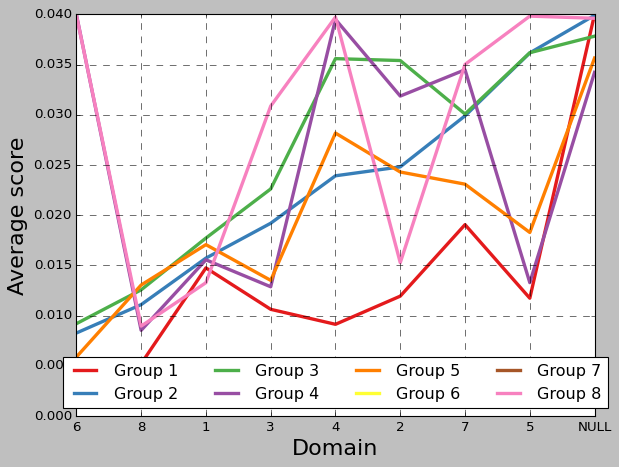

In [116]:
# Compare average score for each team varying domain
groups = np.arange(8) + 1
domains = np.arange(9) + 1
ns = np.array(list(range(0, 110, 10)))

labels = ['Group '+str(g) for g in groups]

scores = np.zeros((groups.shape[0], domains.shape[0], ns.shape[0]))
mask_n = np.ones((domains.shape[0], ns.shape[0])) # mask out settings where some team does not have a result
for i in range(groups.shape[0]):
    if groups[i] == 6 or groups[i] == 7:
        # skip g6
        scores[i] = None
        continue
    for j in range(domains.shape[0]):
        for k in range(ns.shape[0]):
            
            s = score(groups[i], domains[j], 2, ns[k])
            if s is None:
                s = score(groups[i], domains[j], 1, ns[k])
            
            if s is None:
                print(groups[i], domains[j], ns[k])
                mask_n[j, k] = 0
            else:
                scores[i, j, k] = s.mean()
                mask_n[j, k] = ns[k]

n_cap = 5
#print(np.repeat(mask_n[None, :, :], scores.shape[0], axis=0)==0)
scores[np.repeat(mask_n[None, :, :], scores.shape[0], axis=0)==0] = 0 # mask
#print(scores)
scores = scores[:, :, :n_cap].sum(axis=-1) / mask_n[None, :, :n_cap].sum(axis=-1)
#sorted_domains = np.argsort(scores[[i for i in range(8) if i != 5]].mean(axis=0), axis=0)
sorted_domains = np.argsort(scores[1], axis=0)
domains = [domains[i] if i != 8 else 'NULL' for i in sorted_domains]
fig = plot2d(scores[:, sorted_domains], domains, labels, ylabel='Average score', xlabel='Domain')
fig.savefig(os.path.join('plots', f'overall_score_nleq40.png'),
            bbox_inches="tight", format='png')

<Figure size 640x480 with 0 Axes>

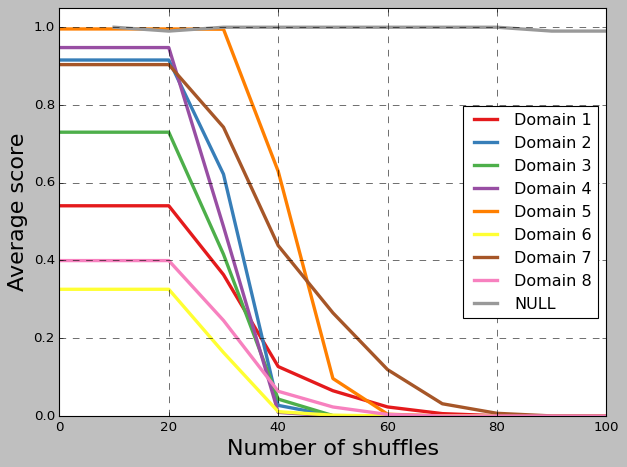

In [28]:
# Fix team, compare domains varying n
team = 2
domains = np.arange(9) + 1
ns = np.array(list(range(0, 110, 10)))

labels = ['Domain '+str(d) for d in domains[:-1]] + ['NULL']

scores = np.zeros((domains.shape[0], ns.shape[0]))
for i in range(domains.shape[0]):
    for j in range(ns.shape[0]):
        s = score(team, domains[i], batch, ns[j])
        if s is None:
            scores[i, j] = None
        else:
            scores[i, j] = s.mean()

fig = plot2d(scores, ns, labels, ylabel='Average score', xlabel='Number of shuffles')
fig.savefig(os.path.join('plots', f'fix_team_{team}.png'),
            bbox_inches="tight", format='png')

Domain 1


<Figure size 640x480 with 0 Axes>

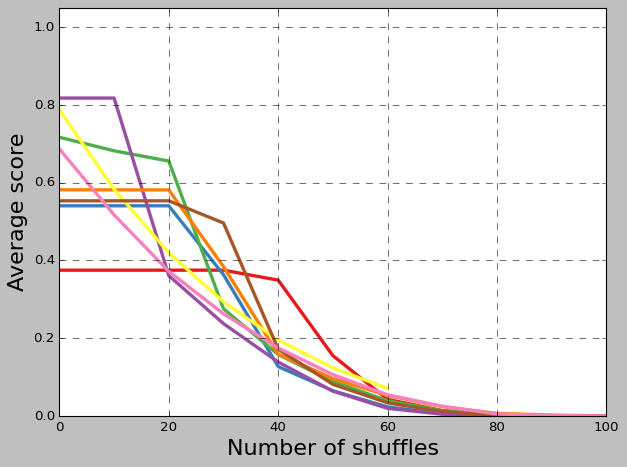

Domain 2


<Figure size 640x480 with 0 Axes>

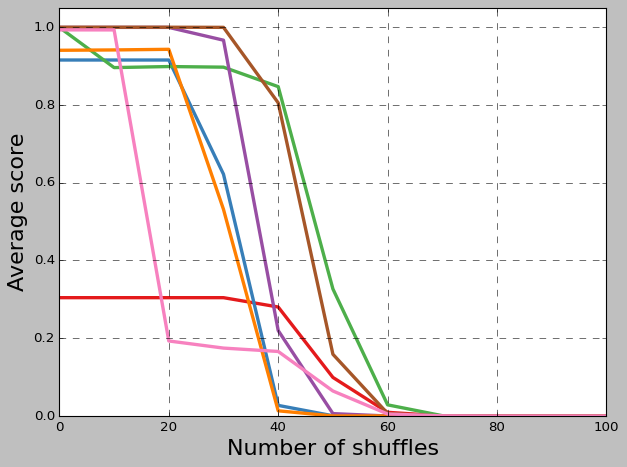

Domain 3


<Figure size 640x480 with 0 Axes>

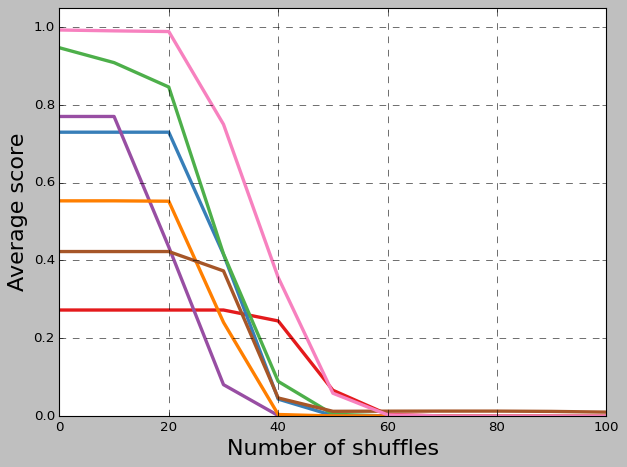

Domain 4


<Figure size 640x480 with 0 Axes>

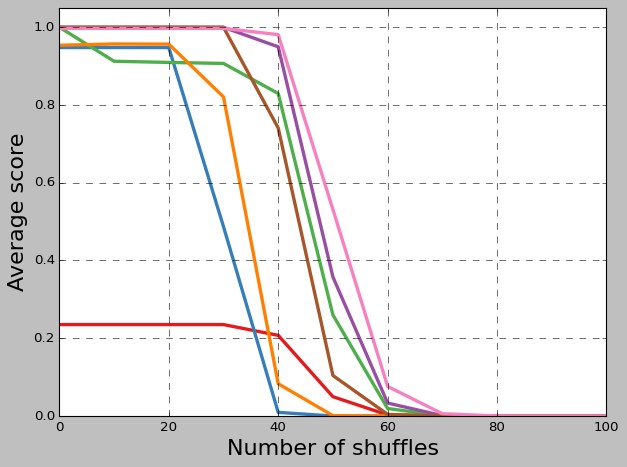

Domain 5


<Figure size 640x480 with 0 Axes>

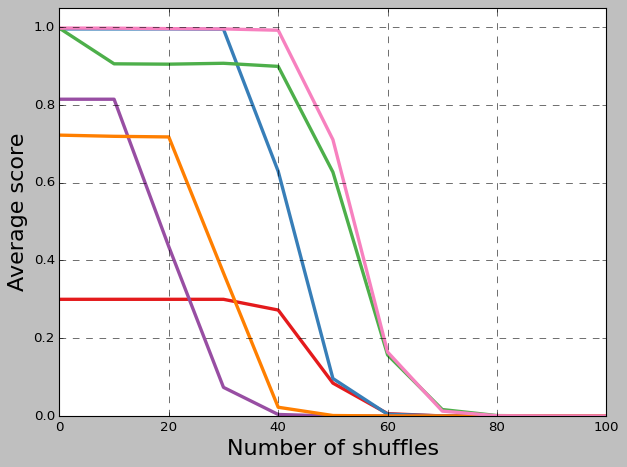

Domain 6


<Figure size 640x480 with 0 Axes>

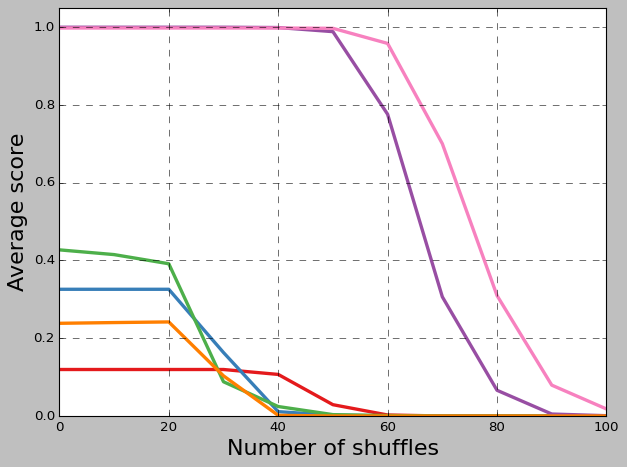

Domain 7


<Figure size 640x480 with 0 Axes>

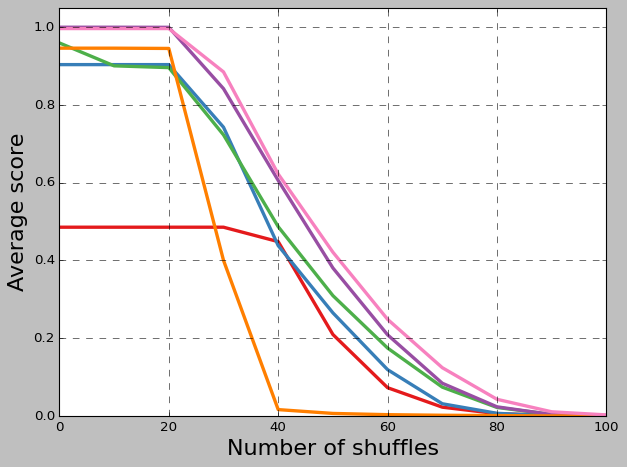

Domain 8


<Figure size 640x480 with 0 Axes>

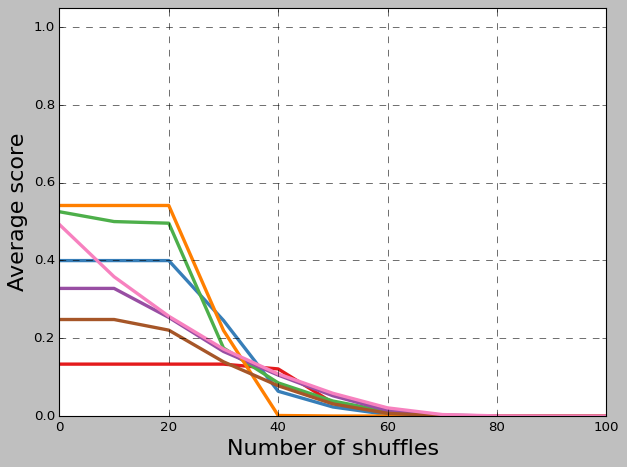

Domain 9


<Figure size 640x480 with 0 Axes>

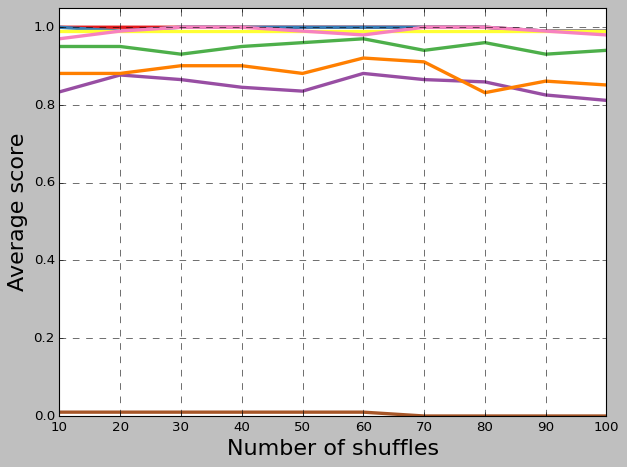

In [49]:
# Fix domain, compare groups across n

domains = np.arange(9) + 1
groups = np.arange(8) + 1
for domain in domains:
    ns = np.array(list(range(0, 110, 10)))

    labels = ['Group '+str(g) for g in groups]

    scores = np.zeros((groups.shape[0], ns.shape[0]))
    for i in range(groups.shape[0]):
        for j in range(ns.shape[0]):
            s = score(groups[i], domain, batch, ns[j])
            if s is None:
                scores[i, j] = None
            else:
                scores[i, j] = s.mean()
    
    print(f'Domain {domain}')
    fig = plot2d(scores, ns, labels, ylabel='Average score', xlabel='Number of shuffles')
    fig.savefig(os.path.join('plots', f'fix_domain_{domain}.png'),
            bbox_inches="tight", format='png')

Domain 1


<Figure size 640x480 with 0 Axes>

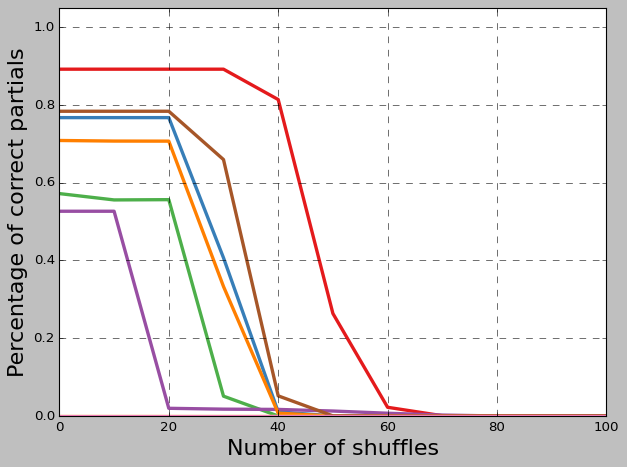

Domain 2


<Figure size 640x480 with 0 Axes>

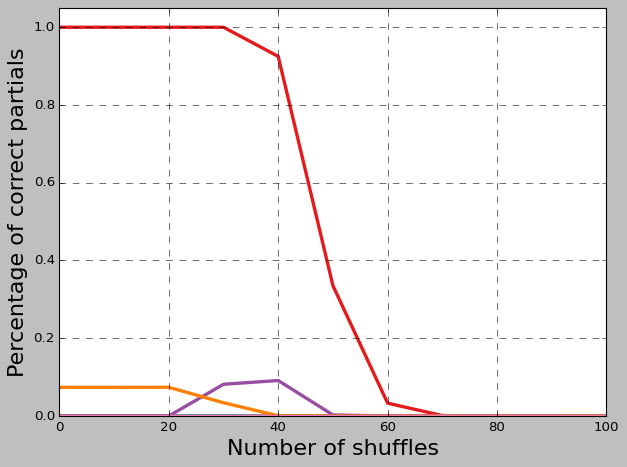

Domain 3


<Figure size 640x480 with 0 Axes>

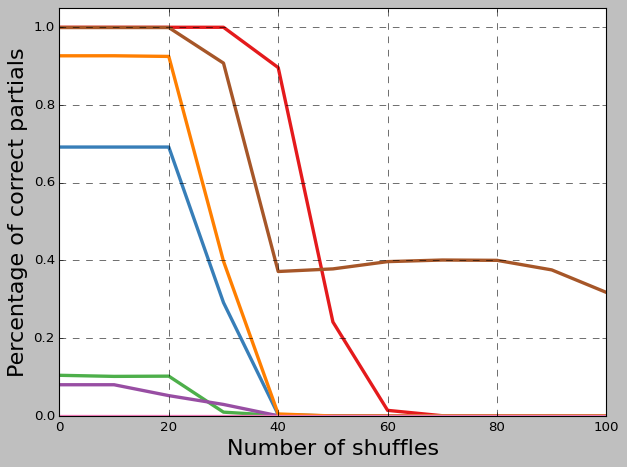

Domain 4


<Figure size 640x480 with 0 Axes>

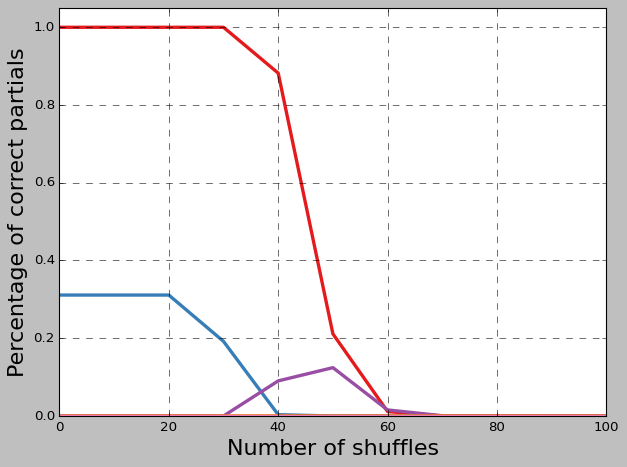

Domain 5


<Figure size 640x480 with 0 Axes>

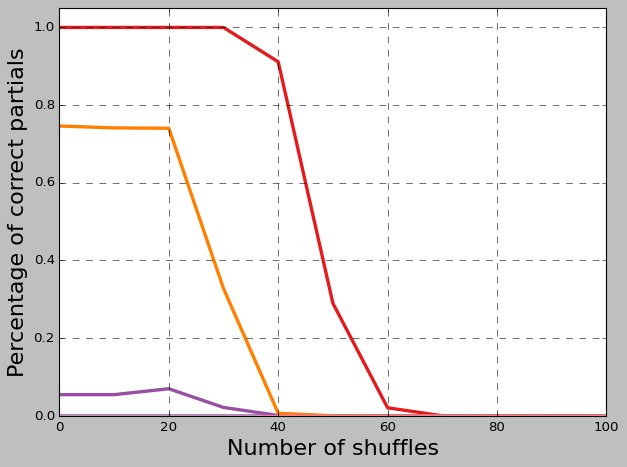

Domain 6


<Figure size 640x480 with 0 Axes>

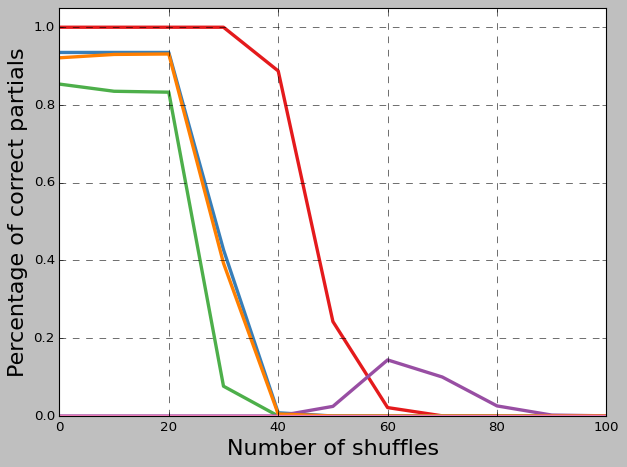

Domain 7


<Figure size 640x480 with 0 Axes>

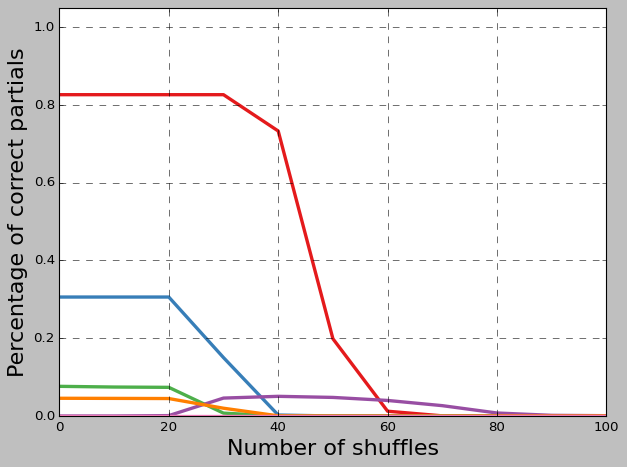

Domain 8


<Figure size 640x480 with 0 Axes>

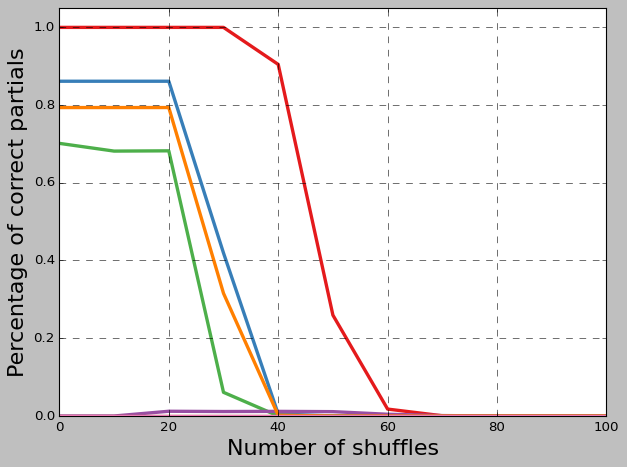

Domain 9


<Figure size 640x480 with 0 Axes>

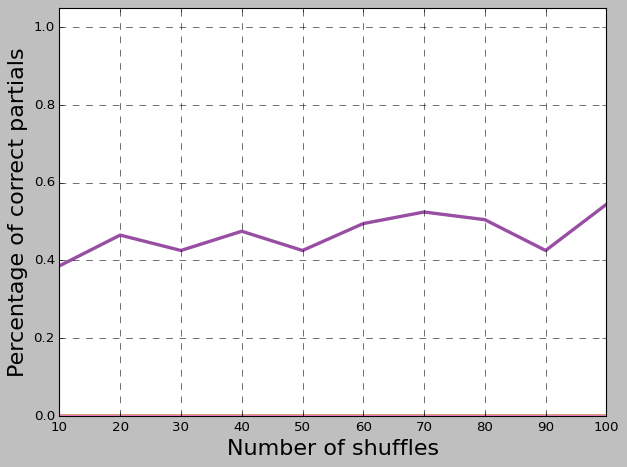

In [52]:
# partial percentage
domains = np.arange(9) + 1
for domain in domains:
    groups = np.arange(8) + 1
    ns = np.array(list(range(0, 110, 10)))

    labels = ['Group '+str(g) for g in groups]


    scores = np.zeros((groups.shape[0], ns.shape[0]))
    for i in range(groups.shape[0]):
        for j in range(ns.shape[0]):
            s = score(groups[i], domain, batch, ns[j])
            if s is None:
                scores[i, j] = None
            else:
                scores[i, j] = s[s*(1-s)>0].shape[0] / s.shape[0]
                #scores[i, j] = (s[s*(1-s)>0].mean()*s[s*(1-s)>0].shape[0] / s.shape[0]) if s[s*(1-s)>0].shape[0] != 0 else 0
    
    print(f'Domain {domain}')
    fig = plot2d(scores, ns, labels, ylabel='Percentage of correct partials', xlabel='Number of shuffles')
    fig.savefig(os.path.join('plots', f'fix_domain_{domain}_partial.png'),
            bbox_inches="tight", format='png')